#### Implement Random Forest Classifier on Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import path_setup
from sklearn.datasets import make_blobs, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Decisiontree import ClassificationTree, RegressionTree
from Ensemble_Learning import RandomForestClassifier, RandomForestRegressor
from ensemble_utils import *

##### 1. Implement Random Forest Classifier on manually generated two-class data

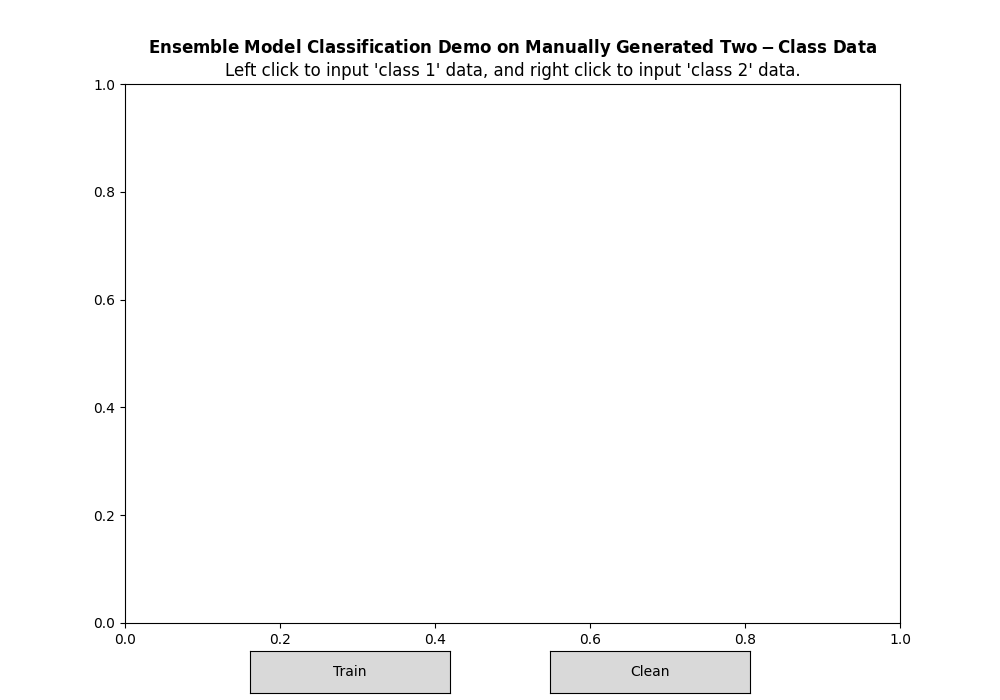

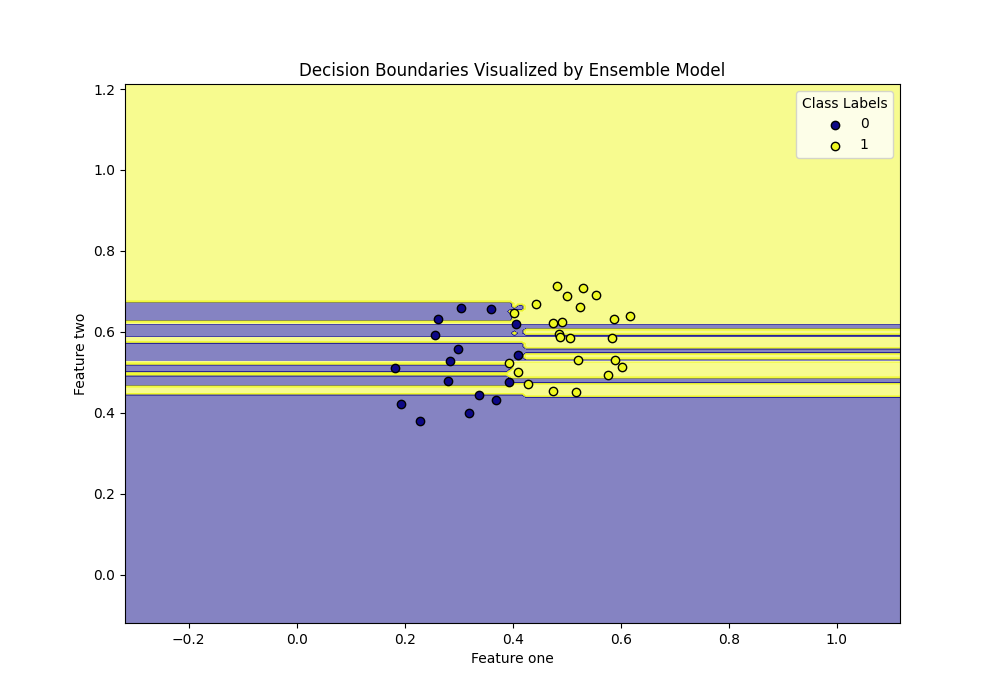

In [3]:
%matplotlib widget
interactive_data_collection_classification('randomforest')

##### 2. Implement Random Forest Classifier on non-linearly separable two-class data

OOB Score for Random Forest Classifier:  0.5616980141436663
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.89      0.57      0.70        14

    accuracy                           0.77        30
   macro avg       0.80      0.75      0.75        30
weighted avg       0.80      0.77      0.76        30



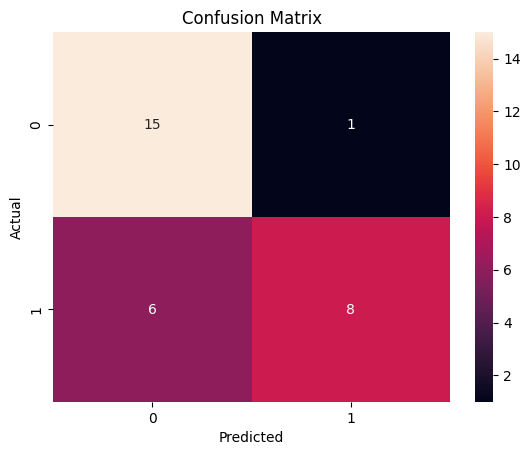

Decision Boundary with Training Data


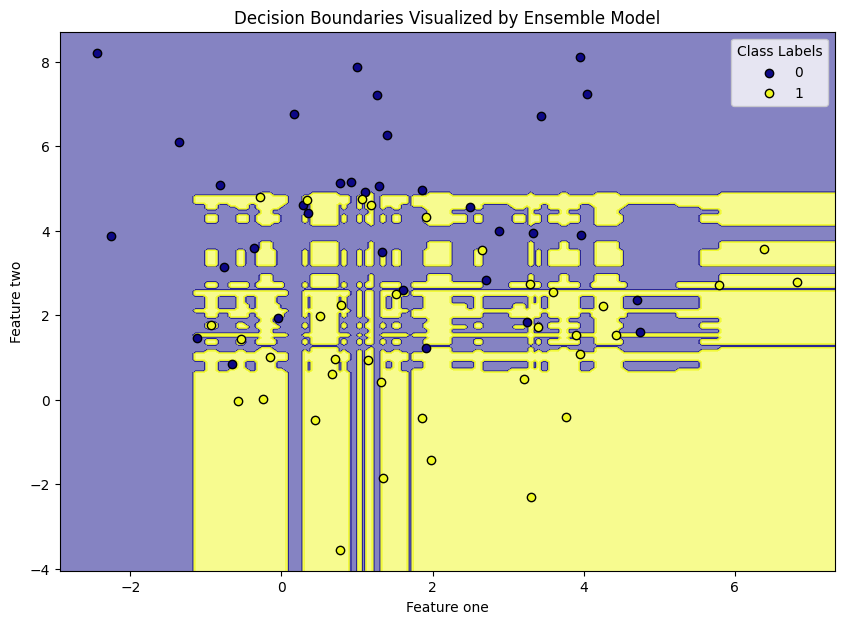

Decision Boundary with Testing Data


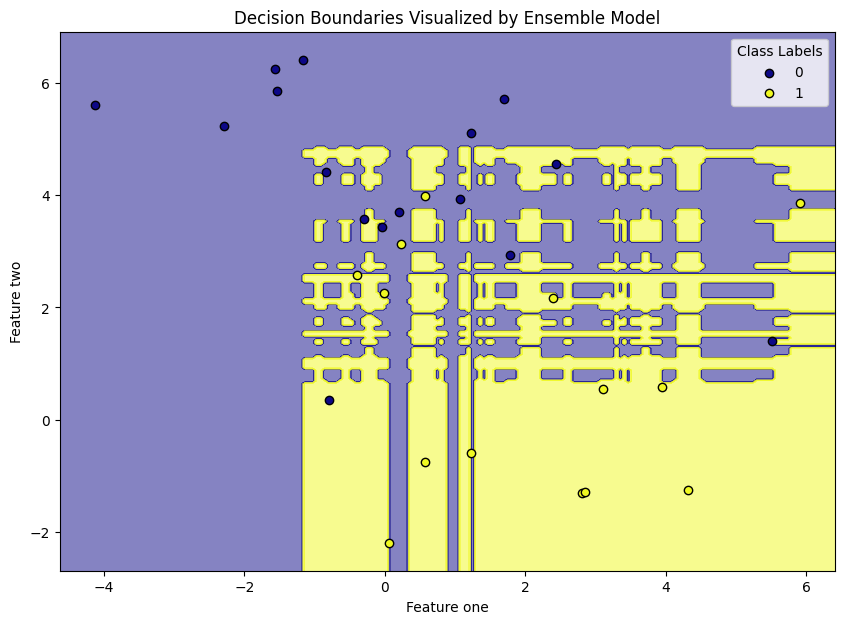

In [2]:
# Create training set
X,y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2, random_state=0)

# Split the data into training and test sets
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=0)

# Create ensemble model
rfc = RandomForestClassifier(model_number=10)
rfc.fit(train_X, train_Y)
print("OOB Score for Random Forest Classifier: ", rfc.oob_score)

# Performance Test
pred_y = rfc.predict_class(test_X)
evaluate_model(test_Y, pred_y, 'classification')

# Plot decision boundaries and class labels
print('Decision Boundary with Training Data')
create_contour_plot(rfc, train_X, train_Y, resolution=200)

print('Decision Boundary with Testing Data')
create_contour_plot(rfc, test_X, test_Y, resolution=200)

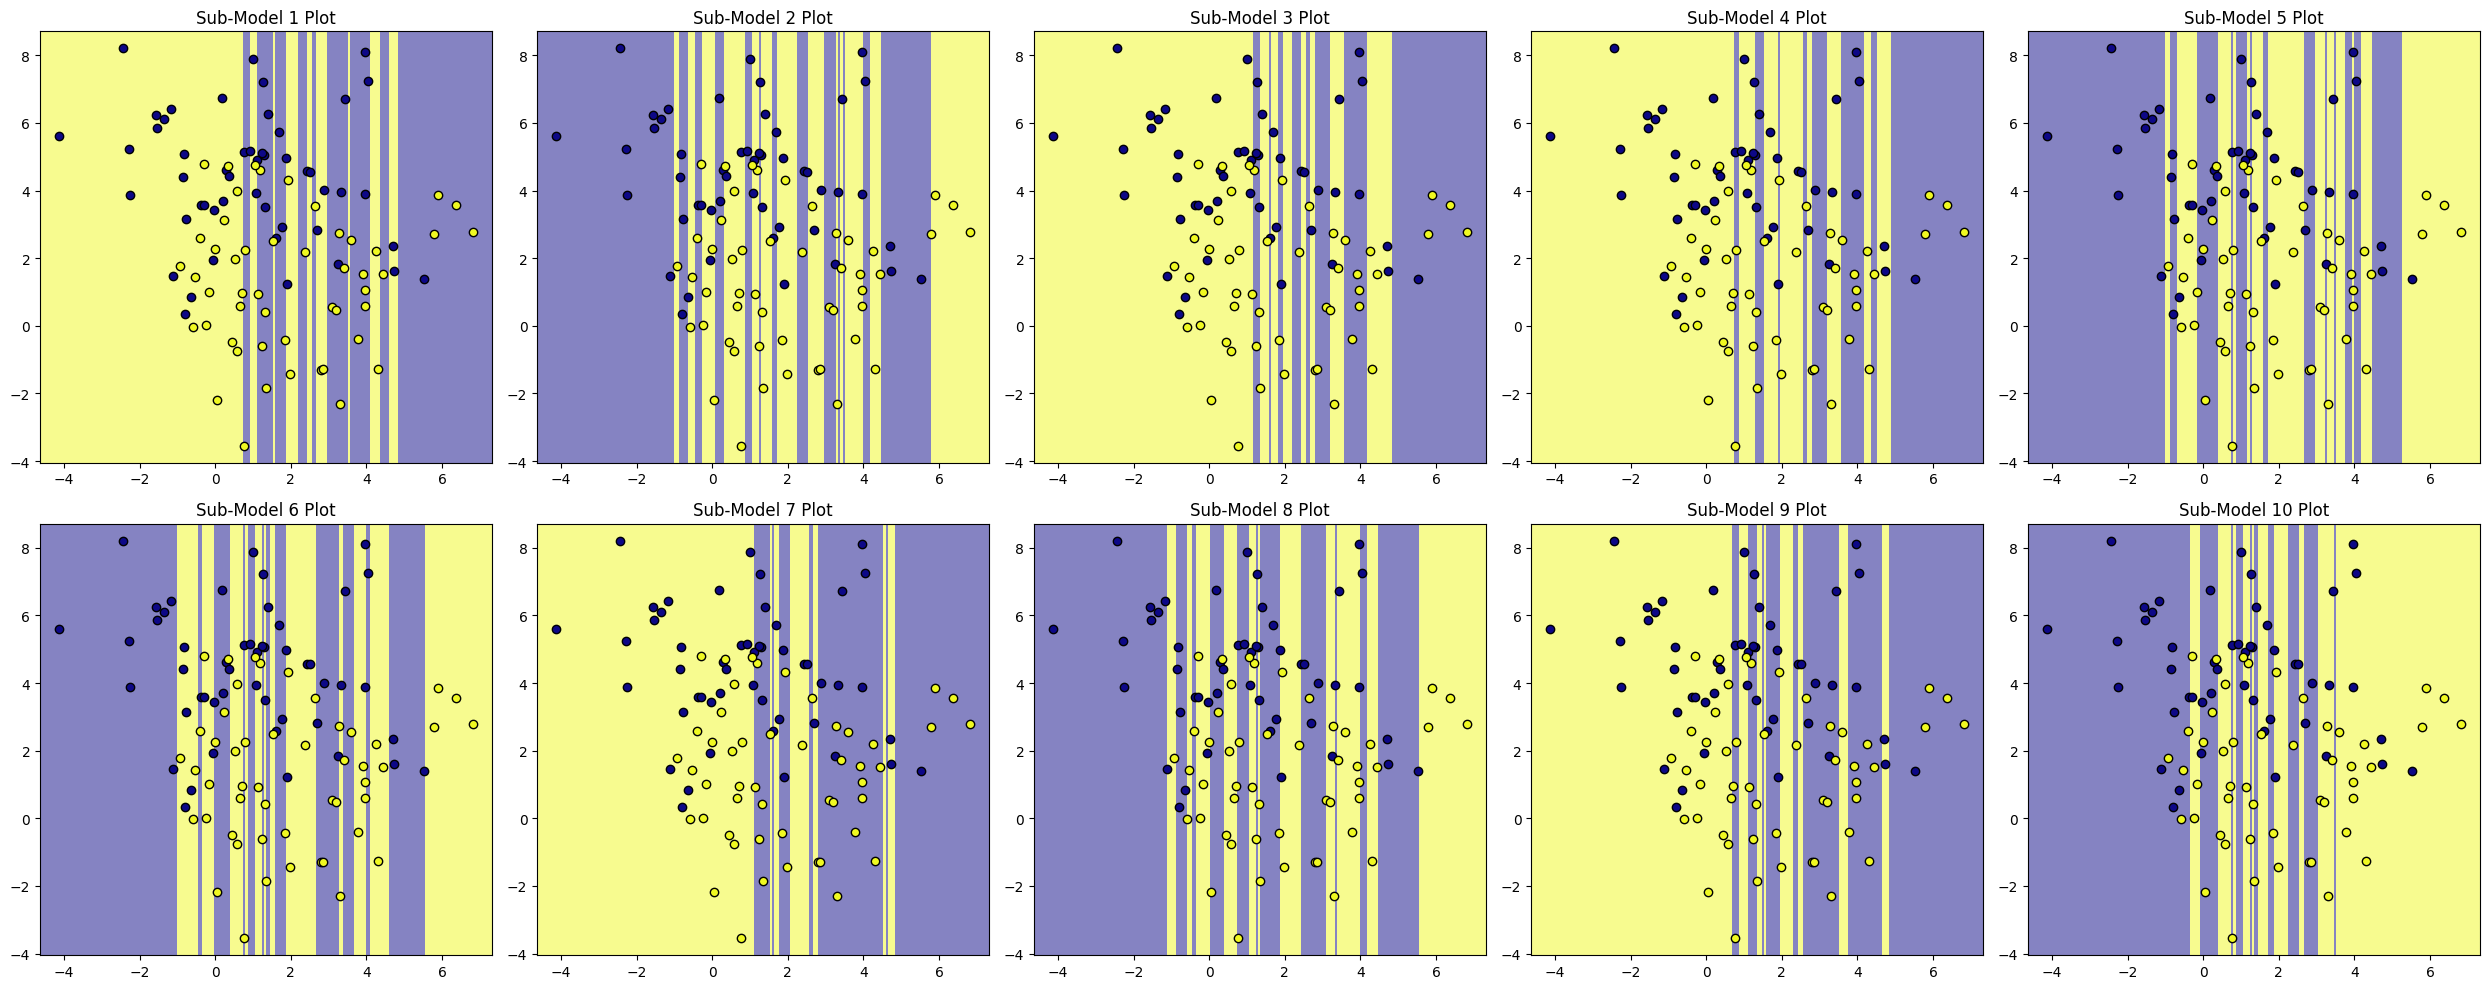

In [4]:
# Displaying the decision boundaries for each decision tree from a random forest classifier.
create_subplots_random_forest(rfc, X, y, resolution=200)

#### Implement Random Forest Classifier on Predicting Marketing Target

In [5]:
# Load Data
market_data = pd.read_csv('../dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

OOB Score for Random Forest Classifier:  0.7947708378512337
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        38
           1       0.96      0.76      0.85        62

    accuracy                           0.83       100
   macro avg       0.83      0.85      0.83       100
weighted avg       0.86      0.83      0.83       100



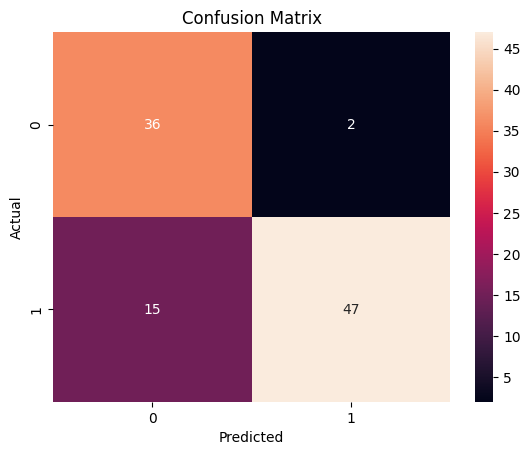

Decision Boundary with Training Data


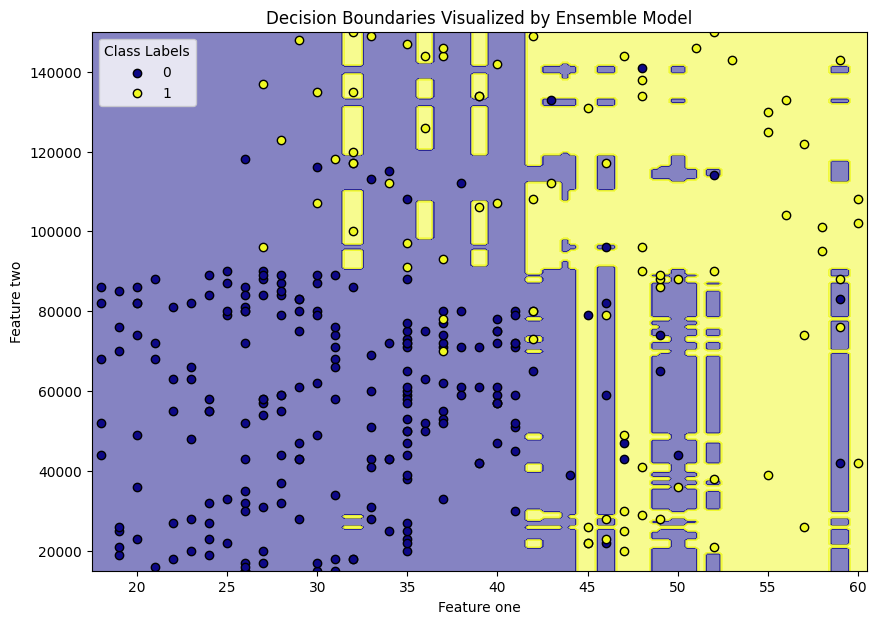

Decision Boundary with Testing Data


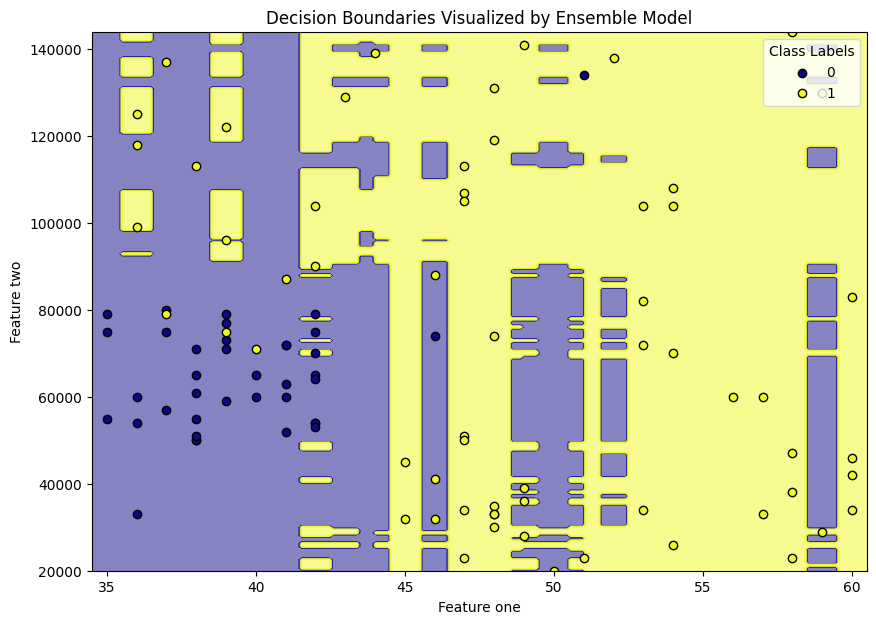

In [7]:
# Create ensemble model
rfc = RandomForestClassifier(model_number=50)
rfc.fit(train_X, train_Y)
print("OOB Score for Random Forest Classifier: ", rfc.oob_score)

# Performance Test
pred_y = rfc.predict_class(test_X)
evaluate_model(test_Y, pred_y, 'classification')

# Plot decision boundaries and class labels
print('Decision Boundary with Training Data')
create_contour_plot(rfc, train_X, train_Y, resolution=200)

print('Decision Boundary with Testing Data')
create_contour_plot(rfc, test_X, test_Y, resolution=200)

#### Implement Random Forest Regressor on Synthetic Data

##### 1. Implement Random Forest Regressor on manually generated two-class data

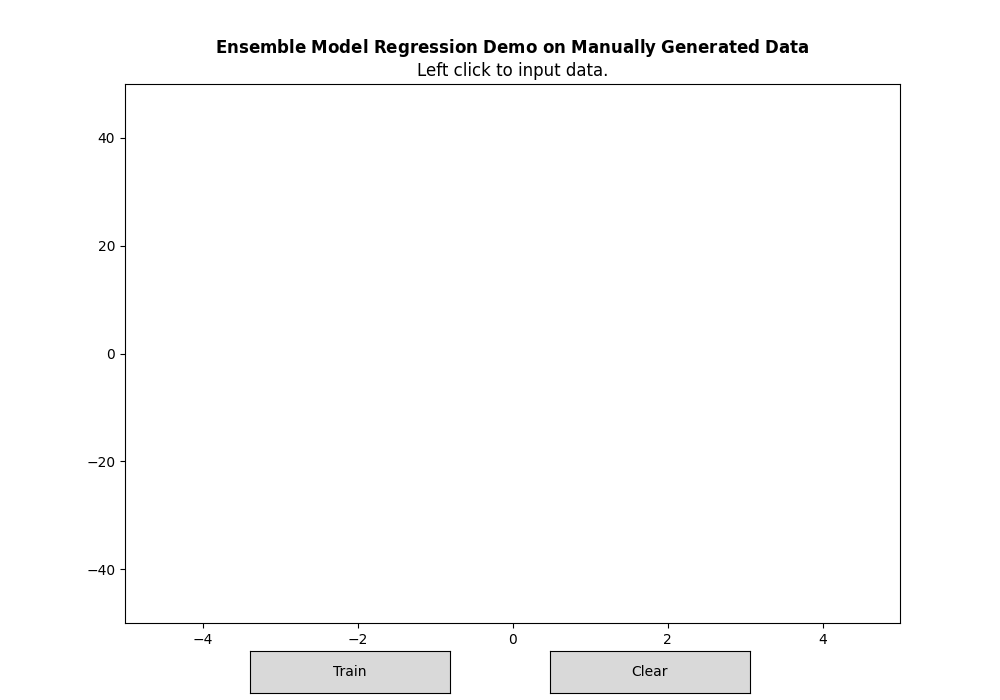

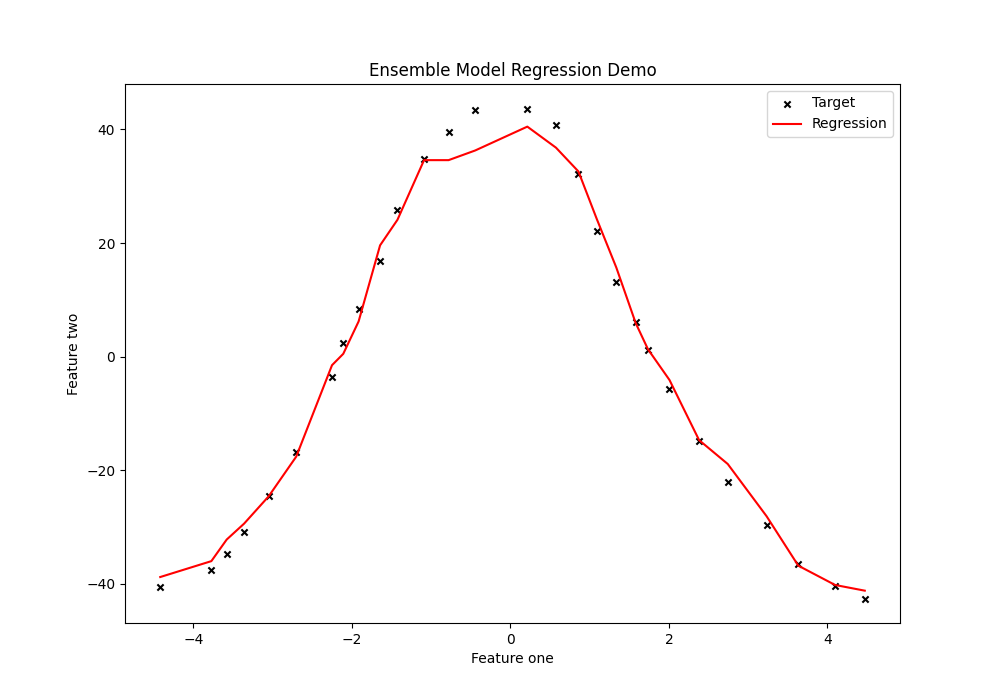

In [4]:
%matplotlib widget
interactive_data_collection_regression('randomforest')

##### 2. Implement Random Forest Regressor on linear data

OOB Score for Bagging Regressor:  0.915479604294653


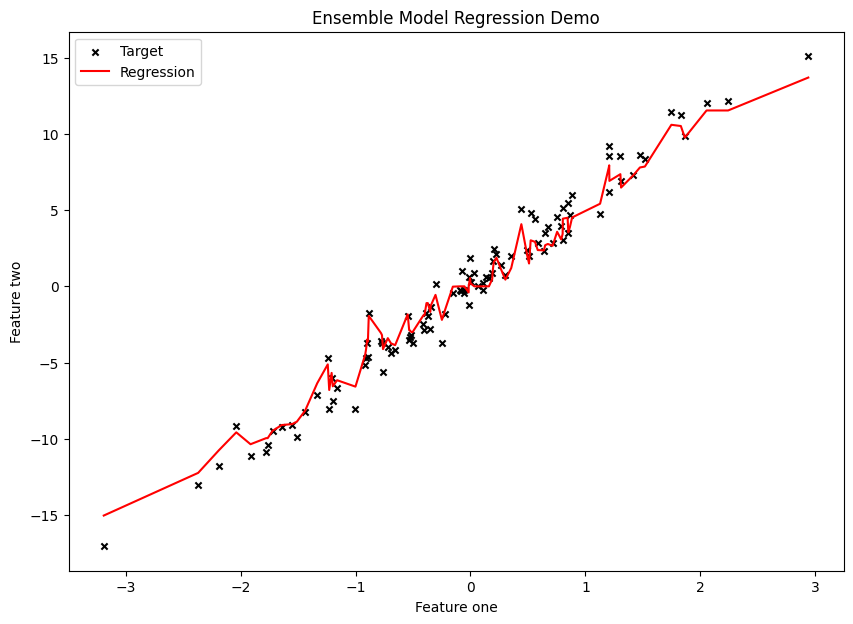

In [9]:
X, y = make_regression(n_samples=100, n_features=1, noise=1)

# Create base regressors
rfr = RandomForestRegressor(model_number=50)
rfr.fit(X, y)
print("OOB Score for Bagging Regressor: ", rfr.oob_score)

# Plot regression and target points
create_regression_plot(rfr, X, y)

##### 3. Implement Random Forest Regressor on nonlinear data

OOB Score for Bagging Regressor:  0.8940361707322846


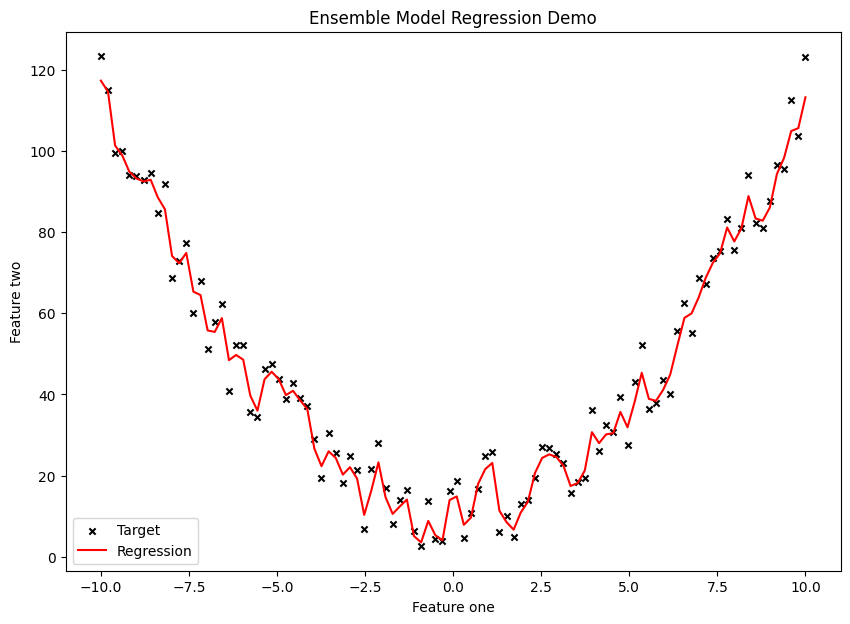

In [10]:
# Create the training set.
X = np.linspace(-10, 10, 100)
y = [x**2 + np.random.rand() * 25 for x in X]

# Create base regressors
rfr = RandomForestRegressor(model_number=50)
rfr.fit(X, y)
print("OOB Score for Bagging Regressor: ", rfr.oob_score)

# Plot regression and target points
create_regression_plot(rfr, X, y)

#### Implement Random Forest Regressor on Predicting House Price

OOB Score for Bagging Regressor:  -1.4518509903286423


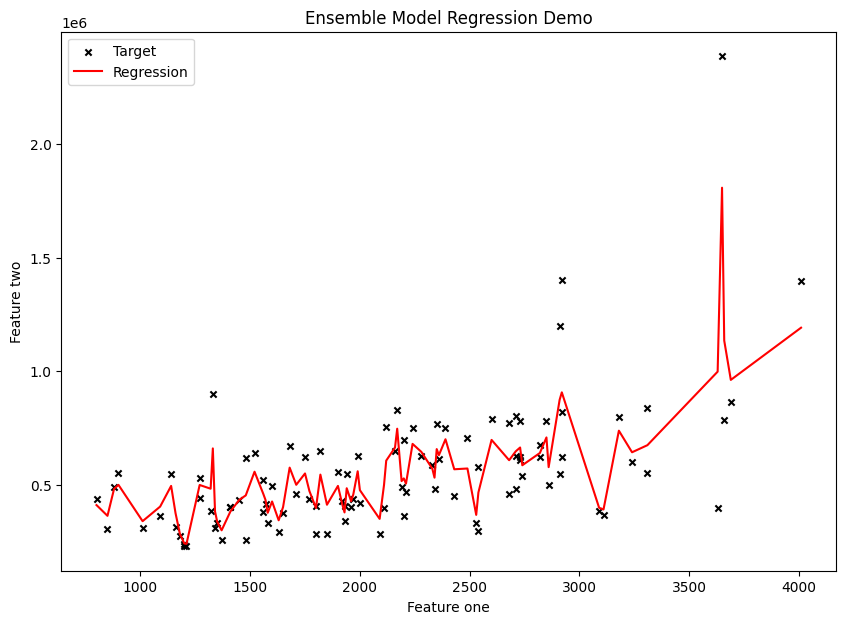

R-squared score (R²):  0.4162337937609576


In [12]:
# Load Data
house_data = pd.read_csv('../dataset/house_price.csv')

# Select first 100 training and next 50 testing data
train_X = np.array(house_data['sqft_living'].head(100))
train_Y = np.array(house_data['price'].head(100))
test_X = np.array(house_data['sqft_living'].iloc[100:150])
test_Y = np.array(house_data['price'].iloc[100:150])

# Create base regressors
rfr = RandomForestRegressor(model_number=50)
rfr.fit(train_X, train_Y)
print("OOB Score for Bagging Regressor: ", rfr.oob_score)

# Plot regression and target points
create_regression_plot(rfr, train_X, train_Y)

# Evaluate model performance on testing data
pred_Y = rfr.predict_value(test_X)
evaluate_model(test_Y, pred_Y, 'regression')